In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

import tensorflow as tf


sns.set_style('darkgrid')
sns.set_context(context='notebook', font_scale=1.5)

2023-11-27 07:36:21.107810: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 07:36:21.107839: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 07:36:21.108809: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 07:36:21.115354: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-27 07:36:21.850291: W tensorflow/compiler/tf2

In [2]:
df = datasets.fetch_california_housing()

In [3]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
description = print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
df = pd.DataFrame(df.data, columns=df.feature_names)

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [8]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [9]:
df.duplicated().sum()

0

## EDA

### Univariate statistical analysis

/home/machinelearning/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


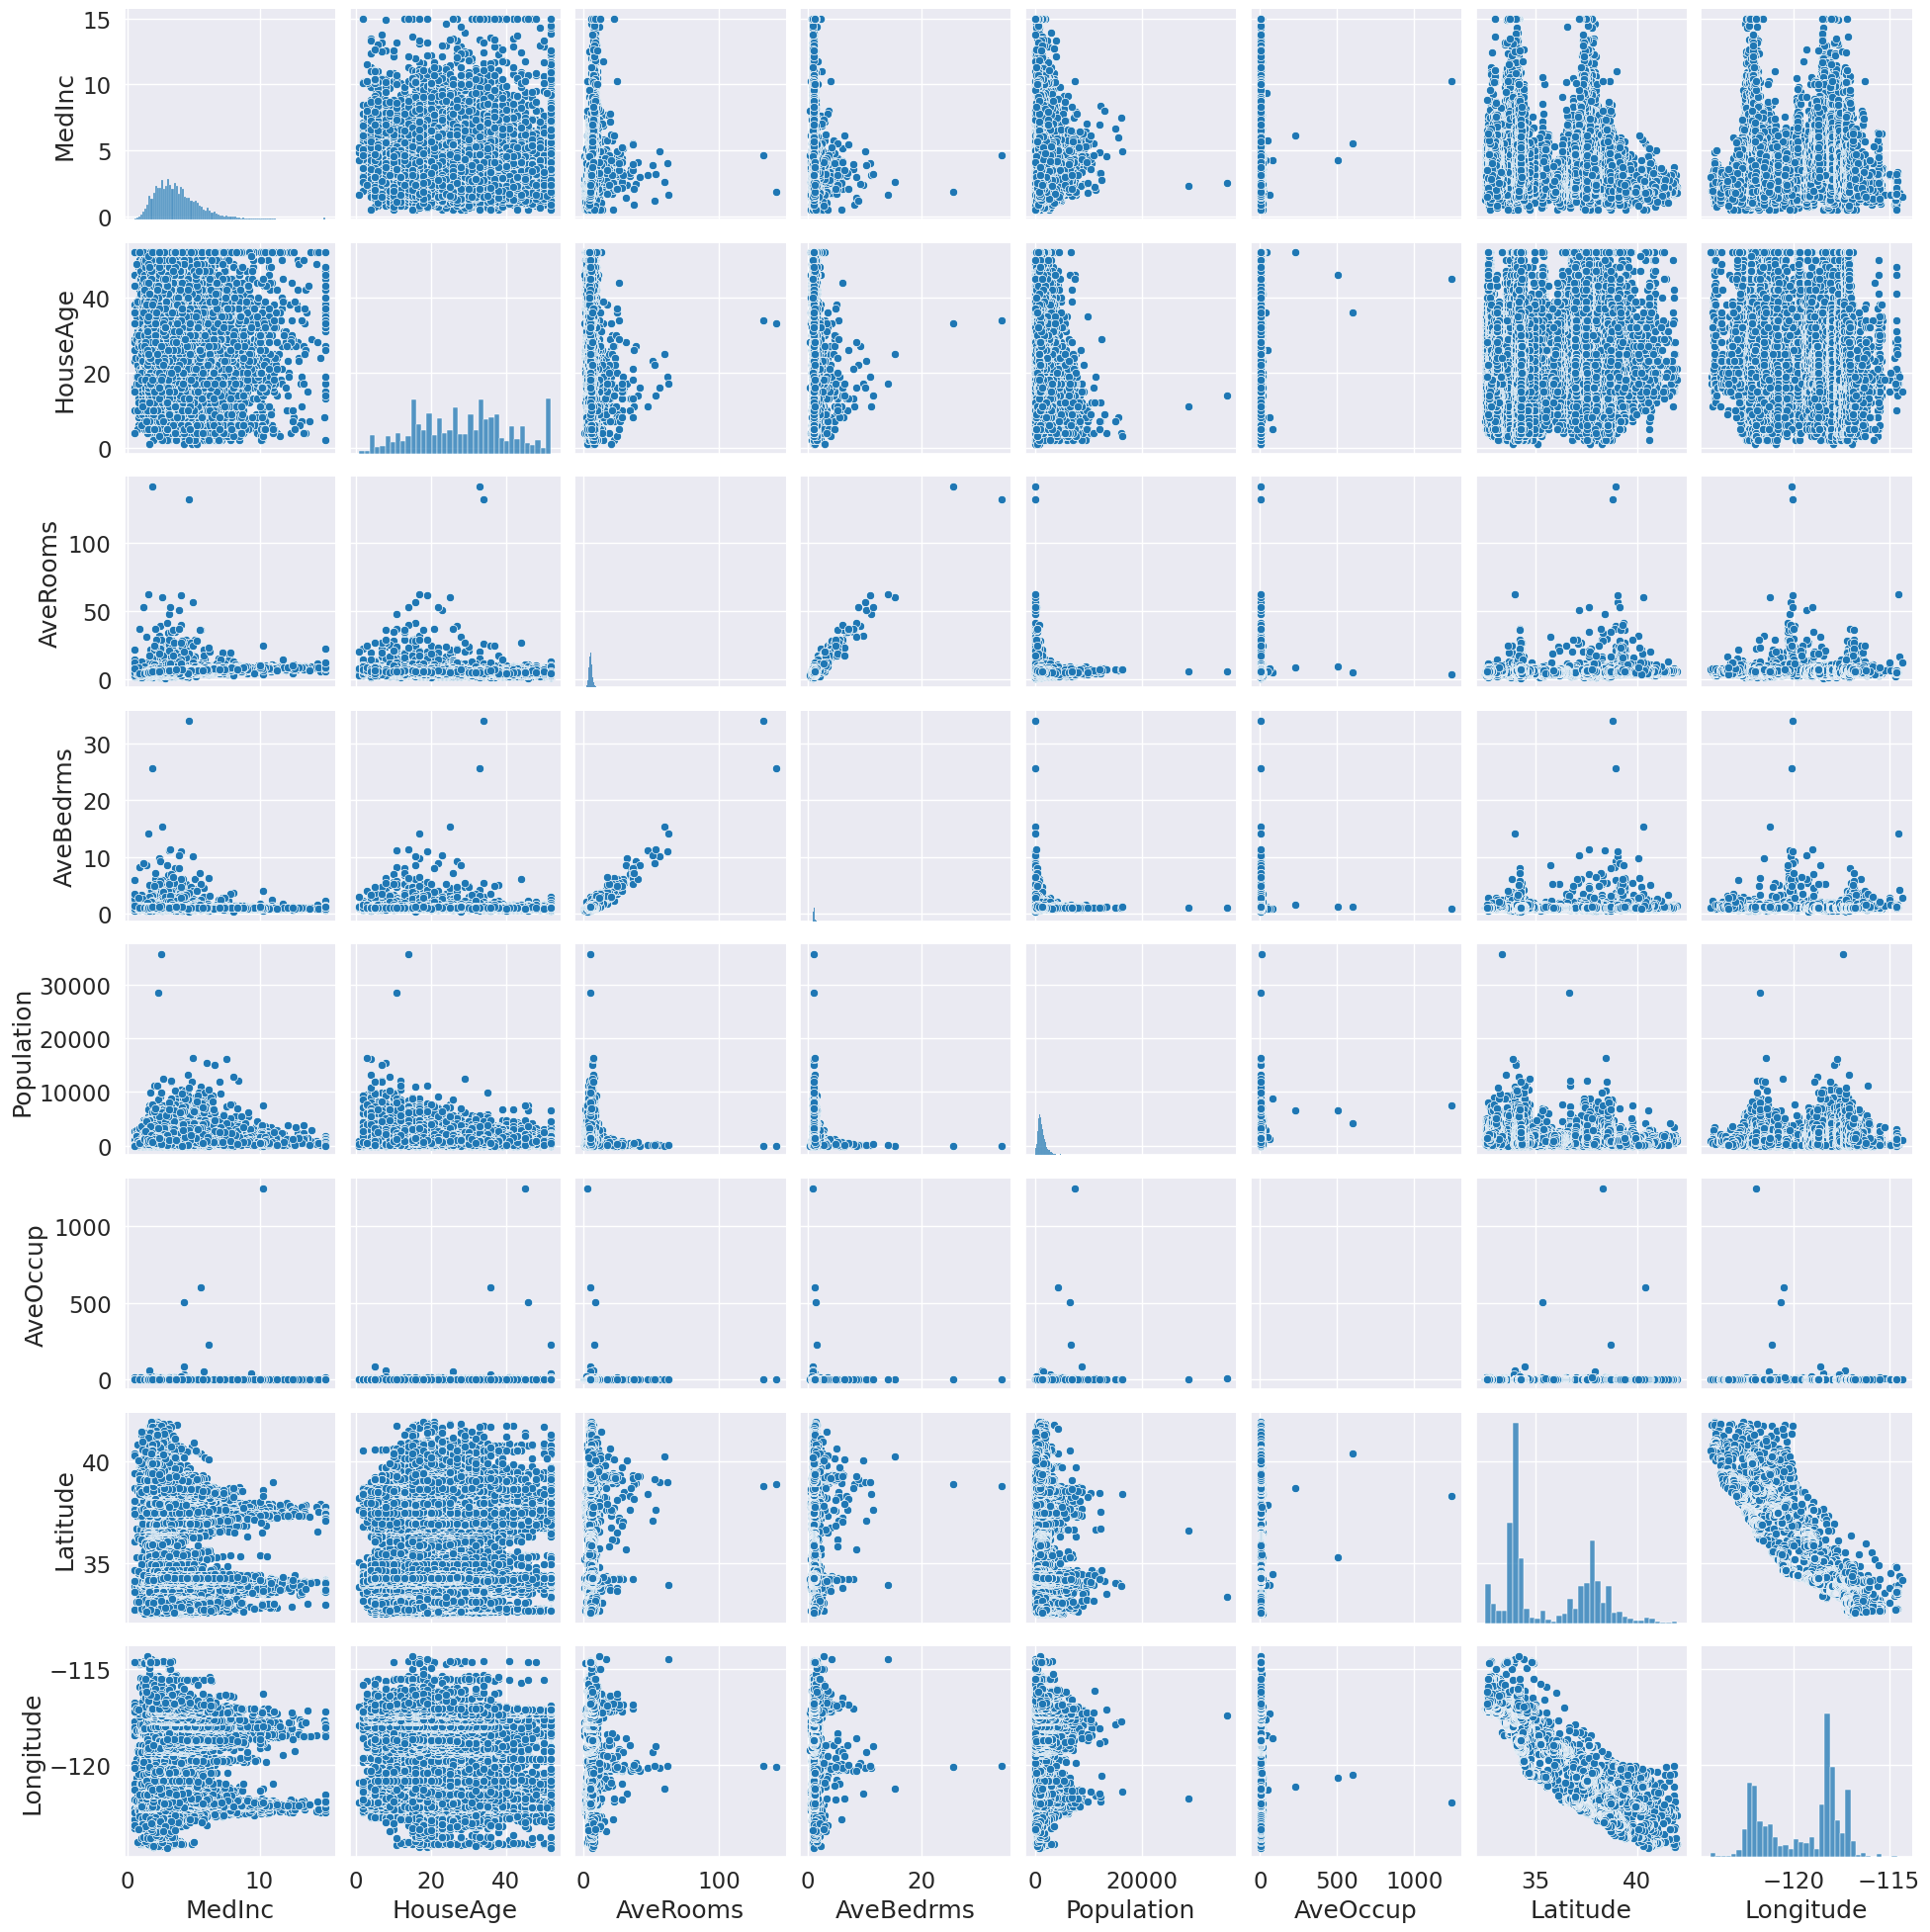

In [10]:
sns.pairplot(df)

Text(0.5, 0, 'Median Income in Block Group')

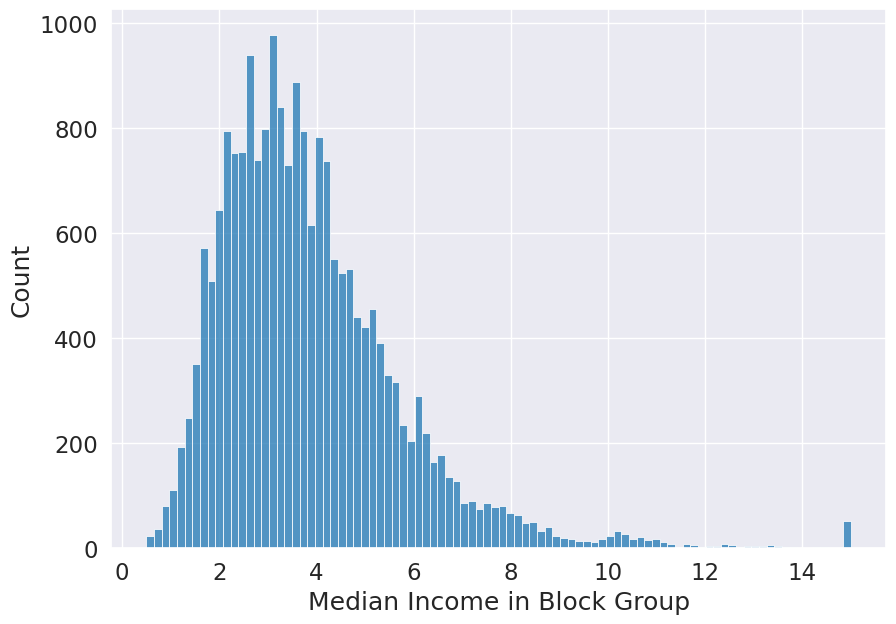

In [11]:
plt.figure(figsize=(10, 7))
sns.histplot(x=df['MedInc'])
plt.xlabel('Median Income in Block Group')

Text(0.5, 0, 'House Age')

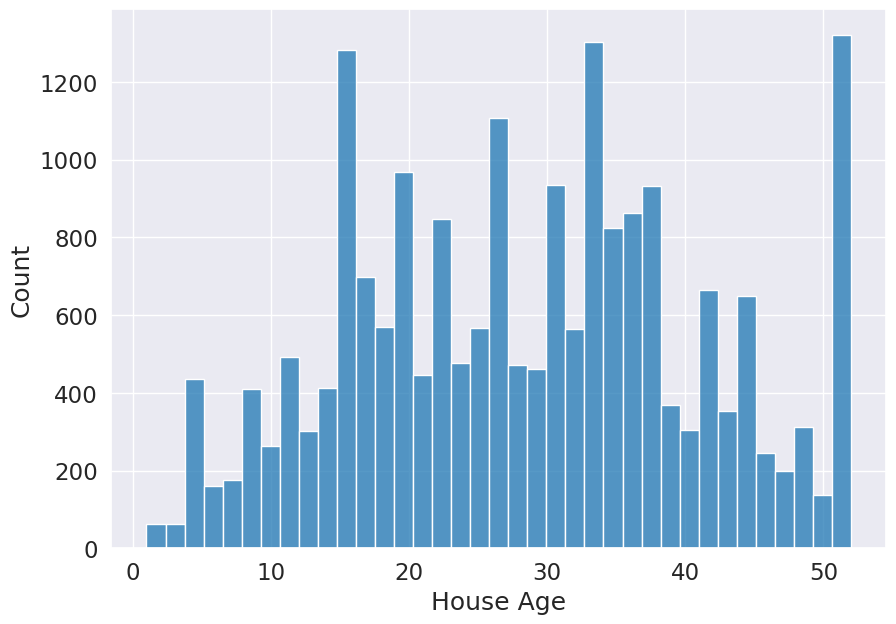

In [12]:
plt.figure(figsize=(10, 7))
sns.histplot(x=df['HouseAge'])
plt.xlabel('House Age')

Text(0.5, 0, 'Median Bedrooms')

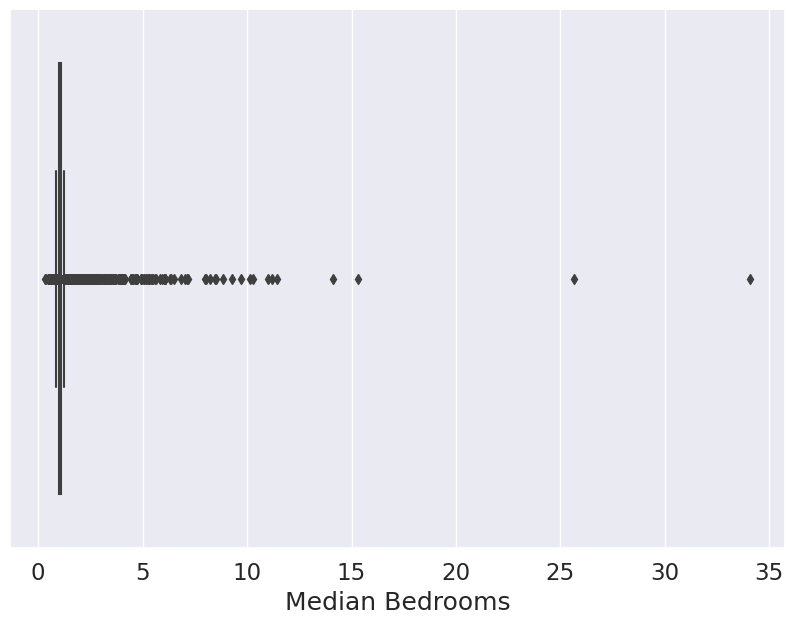

In [13]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=df['AveBedrms'])
plt.xlabel('Median Bedrooms')

Text(0.5, 0, 'Average Number of Household Members')

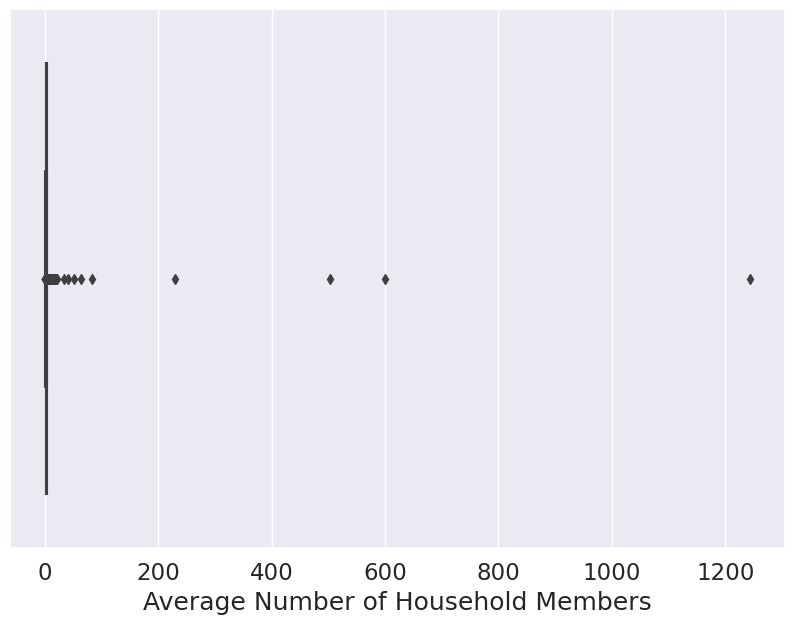

In [14]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=df['AveOccup'])
plt.xlabel('Average Number of Household Members')

Text(0.5, 0, 'Block Group Population')

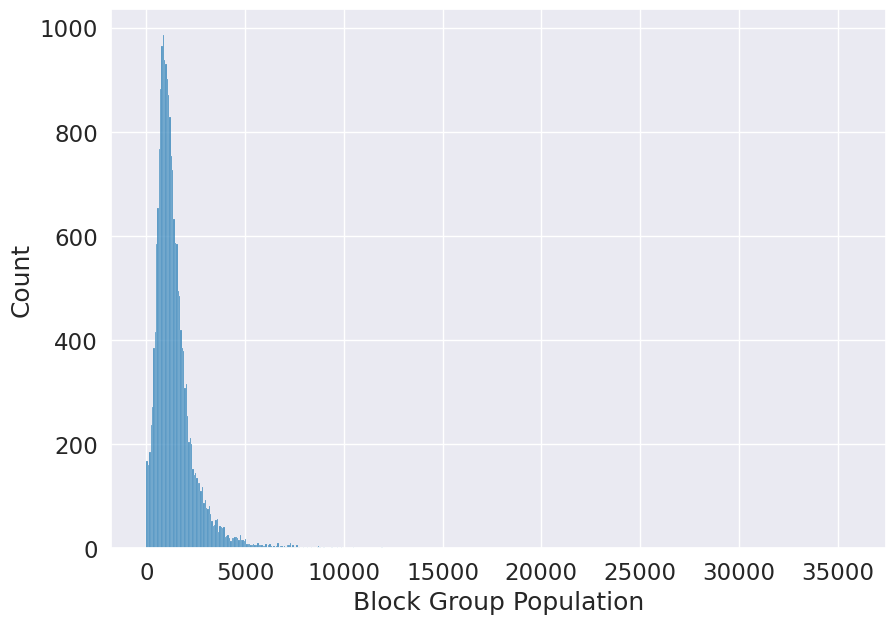

In [15]:
plt.figure(figsize=(10, 7))
sns.histplot(x=df['Population'])
plt.xlabel('Block Group Population')

Text(0.5, 0, 'Average Rooms')

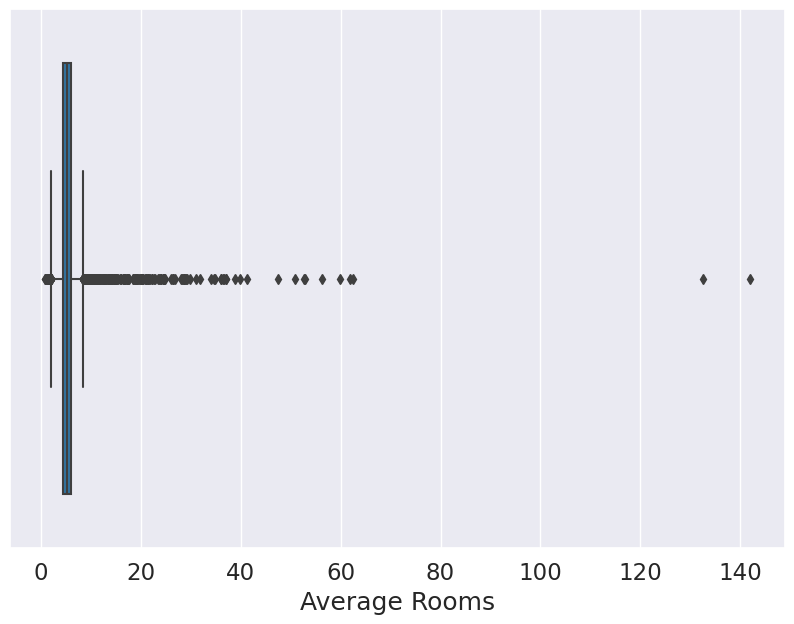

In [16]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=df['AveRooms'])
plt.xlabel('Average Rooms')

### Multivariate statistical analysis

<Axes: xlabel='Longitude', ylabel='Latitude'>

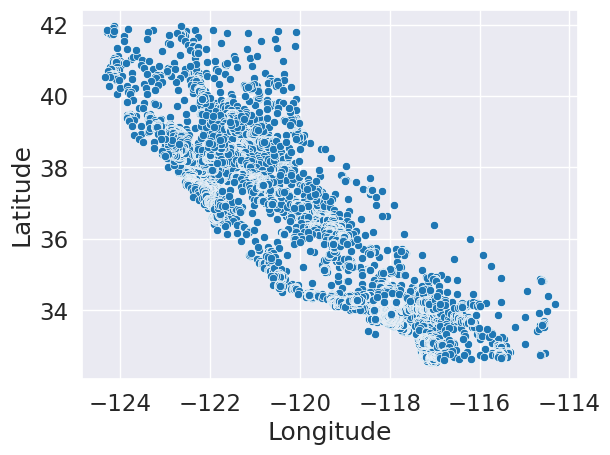

In [17]:
sns.scatterplot(x=df['Longitude'], y=df['Latitude'])

In [18]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

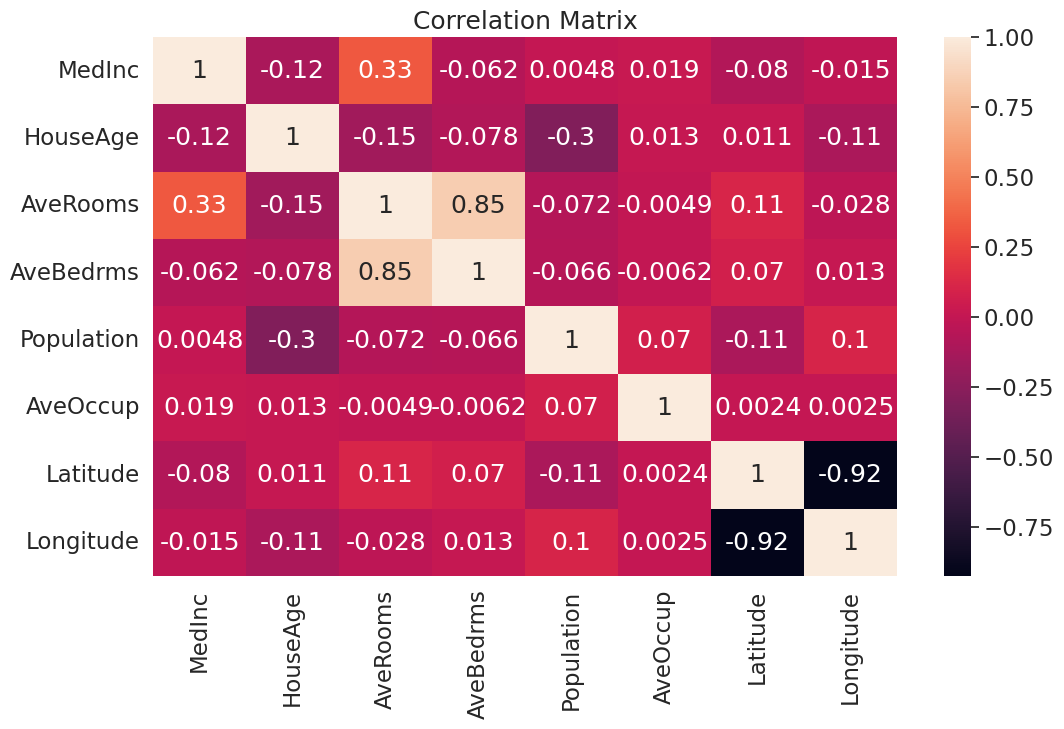

In [19]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')

### Build a model

In [20]:
X = df.drop(columns=['MedInc'])
y = df['MedInc']
X_train = X.sample(frac=.7, random_state=0)
y_train = y.sample(frac=.7, random_state=0)
X_test = X.drop(X_train.index)
y_test = y.drop(y_train.index)
X_val = X_test.sample(frac=0.33, random_state=0)
y_val = y_test.sample(frac=0.33, random_state=0)
X_test = X.drop(X_val.index)
y_test = y.drop(y_val.index)

In [21]:
history = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=[7]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(1)
])

history.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss=['mse'],
               metrics=['mae'])

2023-11-27 07:37:02.715547: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-27 07:37:02.732914: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-27 07:37:02.733116: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [22]:
history.build()

In [23]:
history.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               2400      
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dense_3 (Dense)             (None, 1)                 301       
                                                                 
Total params: 183301 (716.02 KB)
Trainable params: 183301 (716.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
history = history.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], verbose=1)

Epoch 1/100
452/452 [==============================] - 2s 4ms/step - loss: 1.3729 - mae: 0.8753 - val_loss: 1.3346 - val_mae: 0.8475
Epoch 2/100
452/452 [==============================] - 2s 4ms/step - loss: 1.3147 - mae: 0.8520 - val_loss: 1.2346 - val_mae: 0.8317
Epoch 3/100
452/452 [==============================] - 2s 4ms/step - loss: 1.3906 - mae: 0.8783 - val_loss: 1.3781 - val_mae: 0.9051
Epoch 4/100
452/452 [==============================] - 2s 4ms/step - loss: 1.3441 - mae: 0.8631 - val_loss: 1.3510 - val_mae: 0.8543
Epoch 5/100
452/452 [==============================] - 2s 4ms/step - loss: 1.3699 - mae: 0.8728 - val_loss: 1.2769 - val_mae: 0.8419
Epoch 6/100
452/452 [==============================] - 2s 4ms/step - loss: 1.3318 - mae: 0.8595 - val_loss: 1.2782 - val_mae: 0.8534
Epoch 7/100
452/452 [==============================] - 2s 4ms/step - loss: 1.3783 - mae: 0.8750 - val_loss: 1.2646 - val_mae: 0.8543
Epoch 8/100
452/452 [==============================] - 2s 4ms/step - 

452/452 [==============================] - 2s 4ms/step - loss: 1.3010 - mae: 0.8548 - val_loss: 1.1275 - val_mae: 0.7872
Epoch 63/100
452/452 [==============================] - 2s 4ms/step - loss: 1.3007 - mae: 0.8564 - val_loss: 1.2980 - val_mae: 0.8425
Epoch 64/100
452/452 [==============================] - 2s 4ms/step - loss: 1.2708 - mae: 0.8445 - val_loss: 1.6764 - val_mae: 1.0123
Epoch 65/100
452/452 [==============================] - 2s 4ms/step - loss: 1.2899 - mae: 0.8504 - val_loss: 1.2318 - val_mae: 0.8147
Epoch 66/100
452/452 [==============================] - 2s 4ms/step - loss: 1.2658 - mae: 0.8417 - val_loss: 1.2145 - val_mae: 0.8167
Epoch 67/100
452/452 [==============================] - 2s 4ms/step - loss: 1.2438 - mae: 0.8376 - val_loss: 1.2567 - val_mae: 0.8599
Epoch 68/100
452/452 [==============================] - 2s 4ms/step - loss: 1.2853 - mae: 0.8492 - val_loss: 1.1877 - val_mae: 0.8135
Epoch 69/100
452/452 [==============================] - 2s 4ms/step - loss:

In [33]:
def plt_loss():
    plt.figure(figsize=(10,7))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)


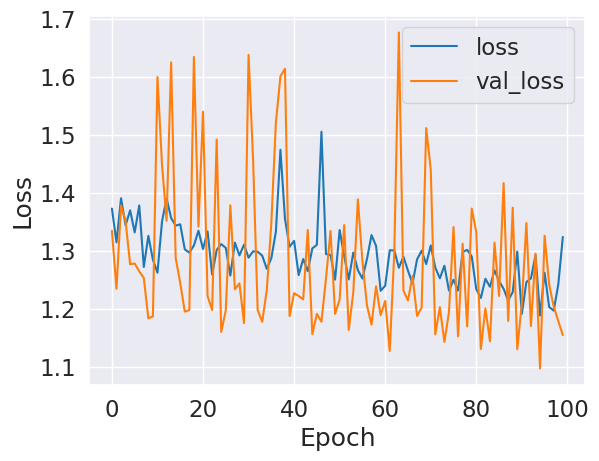

In [34]:
plot_loss()

In [36]:
mse_test = history.model.evaluate(X_test, y_test)
mse_test

582/582 [==============================] - 1s 1ms/step - loss: 1.1548 - mae: 0.7885


[1.1548084020614624, 0.7885124683380127]